C:\Users\aswat\AppData\Local\Temp\ipykernel_5992\816542662.py:154: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=1.5)


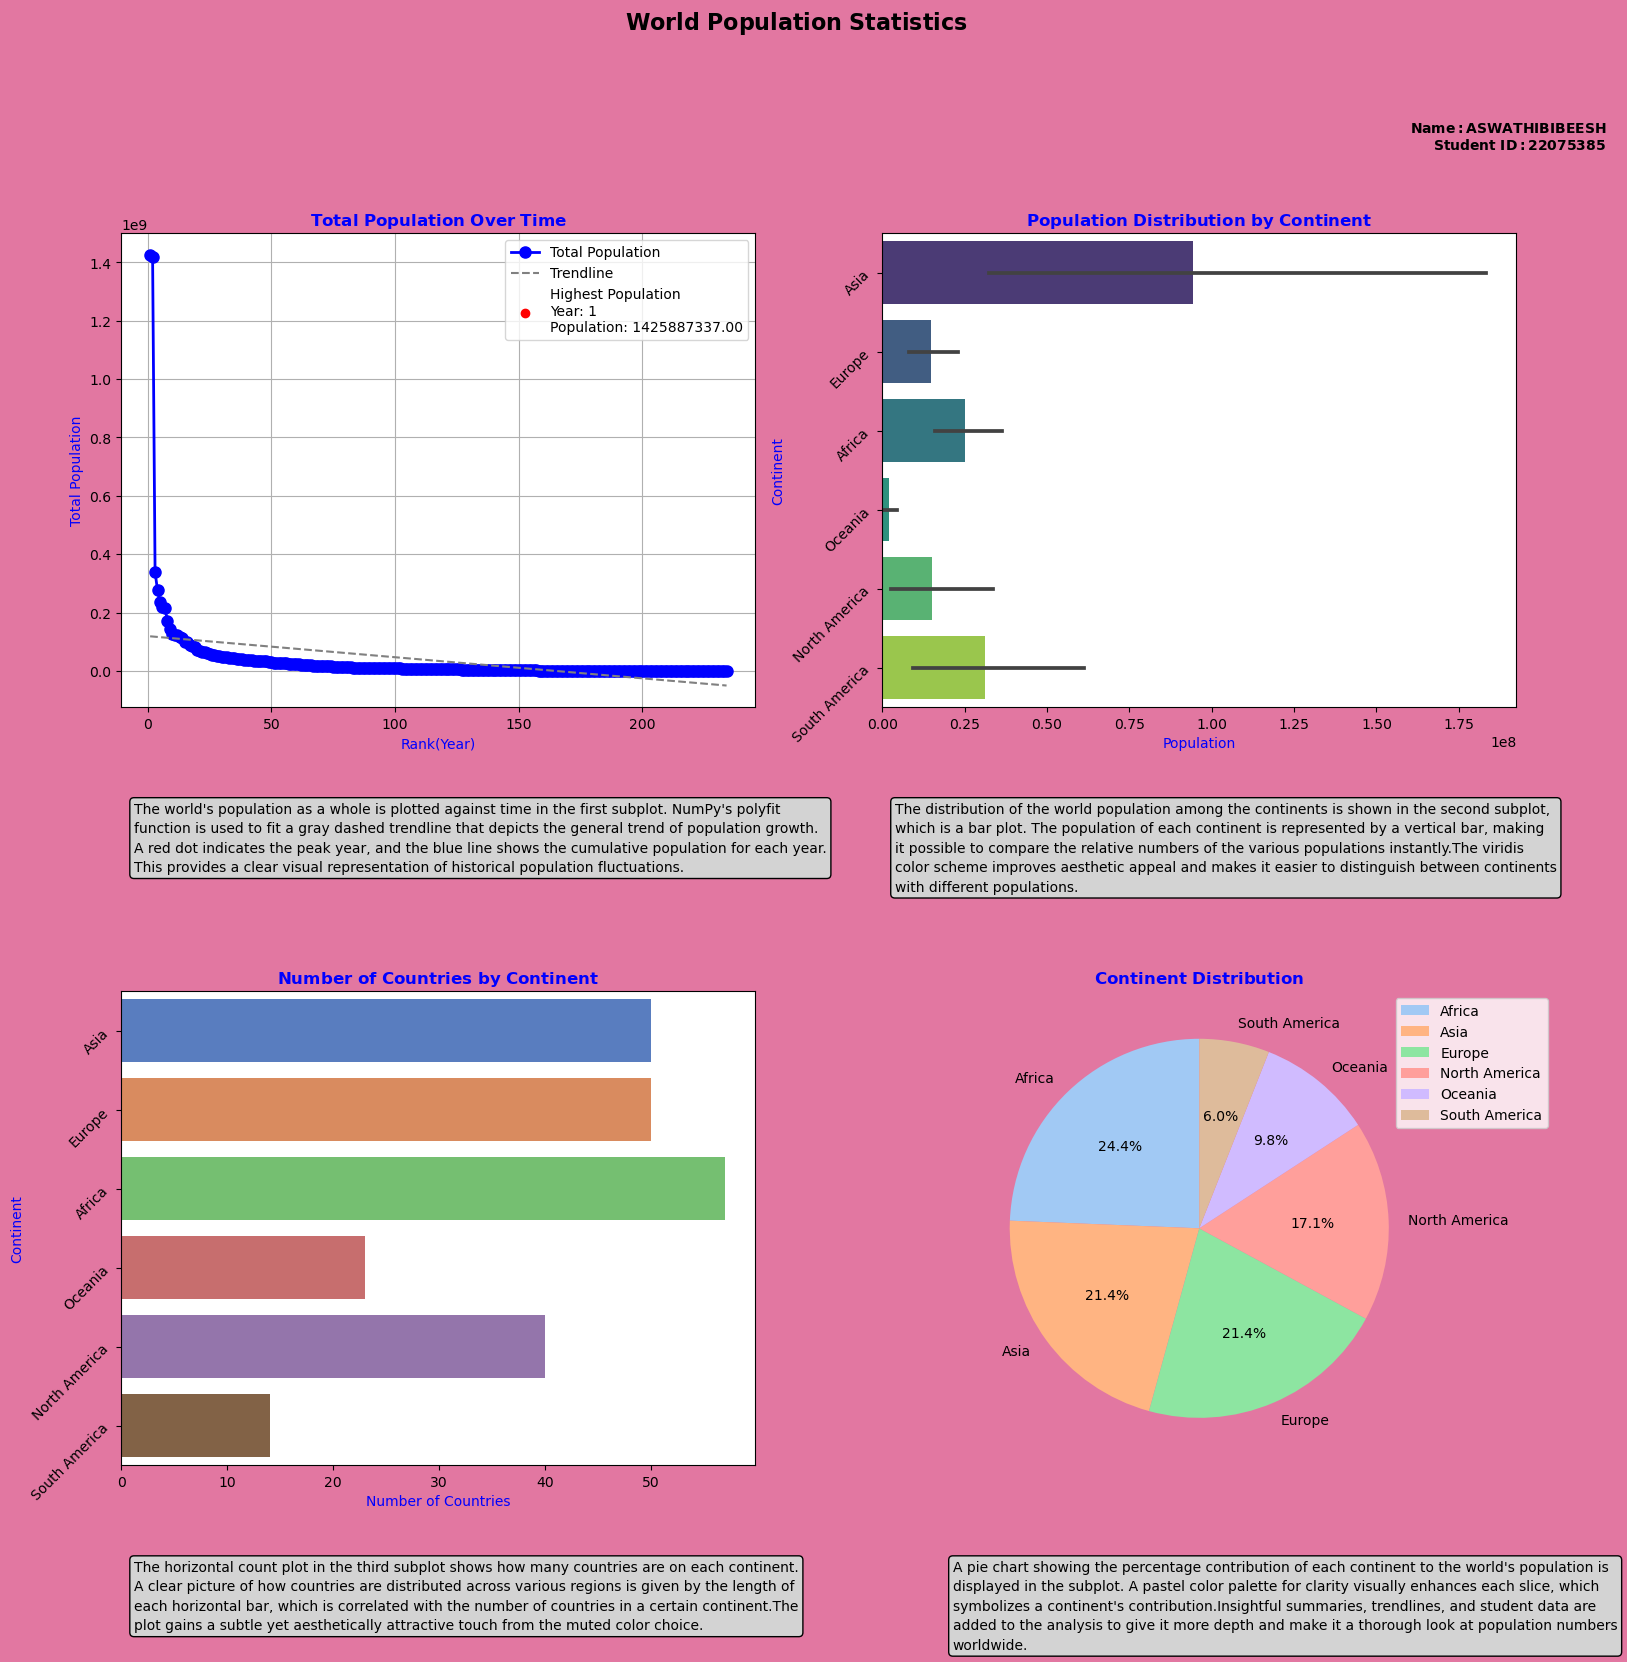

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def load_dataset(file_path):
    """Load the dataset from the given file path."""
    return pd.read_csv(file_path)

def plot_total_population_over_time(ax, df):
    """Plot total population over time with a trendline."""
    population_by_rank = df.groupby('Rank')['2022 Population'].sum()
    population_by_rank.plot(marker='o', linestyle='-', color='blue', linewidth=2, markersize=8, label='Total Population')

    # Add a trendline using NumPy's polyfit
    z = np.polyfit(population_by_rank.index, population_by_rank.values, 1)
    p = np.poly1d(z)
    ax.plot(population_by_rank.index, p(population_by_rank.index), linestyle='--', color='gray', label='Trendline')

    max_population_rank = population_by_rank.idxmax()
    max_population_value = population_by_rank.max()
    ax.scatter(max_population_rank, max_population_value, color='red',
               label=f'Highest Population\nYear: {max_population_rank}\nPopulation: {max_population_value:.2f}')

    ax.set_title(r'$\bf{Total\ Population\ Over\ Time}$', color='blue')
    ax.set_xlabel('Rank(Year)', color='blue')
    ax.set_ylabel('Total Population', color='blue')
    ax.grid(True)
    ax.legend()

    # Summary for Line Plot (Top Left)
    line_plot_summary = (
        "The world's population as a whole is plotted against time in the first subplot. NumPy's polyfit\n"
        "function is used to fit a gray dashed trendline that depicts the general trend of population growth.\n"
        "A red dot indicates the peak year, and the blue line shows the cumulative population for each year.\n"
        "This provides a clear visual representation of historical population fluctuations."
    )

    # Add summary below the Line Plot (Top Left)
    bbox_props_line = dict(boxstyle="round,pad=0.3", fc="lightgrey", ec="black", lw=1)
    ax.text(0.02, -0.2, line_plot_summary, transform=ax.transAxes, fontsize=10, ha='left', va='top', linespacing=1.5,
            bbox=bbox_props_line)

def plot_population_distribution_by_continent(ax, df):
    """Plot population distribution by continent."""
    df['2022 Population'] = pd.to_numeric(df['2022 Population'], errors='coerce')  # Convert to numeric, handle errors by setting them to NaN
    sns.barplot(x='2022 Population', y='Continent', data=df, palette='viridis')
    ax.set_title(r'$\bf{Population\ Distribution\ by\ Continent}$', color='blue')
    ax.set_xlabel('Population', color='blue')
    plt.yticks(rotation=45, ha='right')
    ax.set_ylabel('Continent', color='blue')

    # Summary for Bar Plot (Top Right)
    bar_plot_summary = (
        "The distribution of the world population among the continents is shown in the second subplot,\n"
        "which is a bar plot. The population of each continent is represented by a vertical bar, making\n"
        "it possible to compare the relative numbers of the various populations instantly."
        "The viridis\n"
        "color scheme improves aesthetic appeal and makes it easier to distinguish between continents\n"
        "with different populations."
    )

    # Add summary below the Bar Plot (Top Right)
    bbox_props_bar = dict(boxstyle="round,pad=0.3", fc="lightgrey", ec="black", lw=1)
    ax.text(0.02, -0.2, bar_plot_summary, transform=ax.transAxes, fontsize=10, ha='left', va='top', linespacing=1.5,
            bbox=bbox_props_bar)

def plot_countries_by_continent(ax, df):
    """Plot the number of countries by continent."""
    sns.countplot(y='Continent', data=df, palette='muted')
    ax.set_title(r'$\bf{Number\ of\ Countries\ by\ Continent}$', color='blue')
    ax.set_xlabel('Number of Countries', color='blue')
    plt.yticks(rotation=45, ha='right')
    ax.set_ylabel('Continent', color='blue')

    # Summary for Horizontal Count Plot (Bottom Left)
    count_plot_summary = (
        "The horizontal count plot in the third subplot shows how many countries are on each continent.\n"
        "A clear picture of how countries are distributed across various regions is given by the length of\n"
        "each horizontal bar, which is correlated with the number of countries in a certain continent."
        "The\n"
        "plot gains a subtle yet aesthetically attractive touch from the muted color choice."
    )

    # Add summary below the Horizontal Count Plot (Bottom Left)
    bbox_props_count = dict(boxstyle="round,pad=0.3", fc="lightgrey", ec="black", lw=1)
    ax.text(0.02, -0.2, count_plot_summary, transform=ax.transAxes, fontsize=10, ha='left', va='top', linespacing=1.5,
            bbox=bbox_props_count)

def plot_continent_distribution(ax, df):
    """Plot a pie chart based on continent distribution."""
    continent_distribution = df['Continent'].value_counts()

    wedges, _, _ = ax.pie(continent_distribution, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'),
                          labels=continent_distribution.index)
    ax.legend(continent_distribution.index, loc='upper right', bbox_to_anchor=(1.25, 1))
    ax.set_title(r'$\bf{Continent\ Distribution}$', color='blue')

    # Summary for Pie Chart (Bottom Right)
    pie_chart_summary = (
        "A pie chart showing the percentage contribution of each continent to the world's population is\n"
        "displayed in the subplot. A pastel color palette for clarity visually enhances each slice, which\n"
        "symbolizes a continent's contribution."
        "Insightful summaries, trendlines, and student data are\n"
        "added to the analysis to give it more depth and make it a thorough look at population numbers\n"
        "worldwide."
    )

    # Add summary below the Pie Chart (Bottom Right)
    bbox_props_pie = dict(boxstyle="round,pad=0.3", fc="lightgrey", ec="black", lw=1)
    ax.text(-0.02, -0.2, pie_chart_summary, transform=ax.transAxes, fontsize=10, ha='left', va='top', linespacing=1.5,
            bbox=bbox_props_pie)

def add_student_info(ax):
    """Add student name and ID in the top right corner."""
    student_info = r'$\bf{Name: ASWATHI BIBEESH}$' + '\n' + r'$\bf{Student\ ID: 22075385}$'
    plt.gcf().text(0.95, 0.95, student_info, fontsize=10, ha='right', va='top', color='black')

def main():
    # Load the dataset
    file_path = 'world_population.csv'
    df = load_dataset(file_path)

    # Display general summary statistics
    summary_stats = df.describe()

    # Example 2: World Population Data Visualization
    plt.figure(figsize=(18, 16), facecolor='#E277A1')  # Set the background color here
    plt.suptitle(r'$\bf{World\ Population\ Statistics}$', y=1.02, fontsize=16)

    # Define a gridspec to control subplot layout
    gs = plt.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1], wspace=0.2, hspace=0.6)  # Increase hspace here

    # Subplot 1: Line plot of total population over time (Top Left)
    ax1 = plt.subplot(gs[0, 0])
    plot_total_population_over_time(ax1, df)

    # Subplot 2: Bar plot for population distribution by continent (Top Right)
    ax2 = plt.subplot(gs[0, 1])
    plot_population_distribution_by_continent(ax2, df)

    # Subplot 3: Horizontal count plot of countries by continent (Bottom Left)
    ax3 = plt.subplot(gs[1, 0])
    plot_countries_by_continent(ax3, df)

    # Subplot 4: Pie chart based on continent distribution (Bottom Right)
    ax4 = plt.subplot(gs[1, 1])
    plot_continent_distribution(ax4, df)

    # Add student info
    add_student_info(plt)

    # Adjust layout to add gap between subplots
    plt.tight_layout(pad=1.5)

    # Save the plot
    plt.show()

if __name__ == "__main__":
    main()
